In [54]:
import pandas as pd
from ecological_fallacy.datasets import kumar

DATASET_PATH = 'kumar_dataset.json'
SAMPLE_PATH = '../../data/processed/kumar/sample_5000_annotators_v3.csv'

In [55]:
all_data = kumar.Dataset.load(
    SAMPLE_PATH,
    metadata_path = DATASET_PATH,
    do_majority_aggregation = False
)

  0%|          | 0/23 [00:00<?, ?ba/s]

In [56]:
df = pd.read_csv(SAMPLE_PATH)

In [57]:
annotator_ids = df['worker_id'].unique()
records = []
for annotator in annotator_ids:
    record = {
        'worker_id': annotator,
    }
    metadata = all_data.sociodemographic_mapping[annotator]
    record.update(metadata)
    records.append(record)
df_annotators = pd.DataFrame.from_records(records).set_index('worker_id')

In [58]:
# double check that there is no annotator under 18
df_annotators[df_annotators['age_range'] == 'Under 18'].shape[0]

0

In [59]:
df_age = pd.DataFrame(df_annotators['age_range'].value_counts()).sort_index()
df_age.columns = ['Number of Annotators']
df_age.index.name = 'Age'
df_age

,Number of Annotators
Age,
18 - 24,489
25 - 34,1861
35 - 44,1115
45 - 54,529
55 - 64,321
65 or older,119
Prefer not to say,568


In [60]:
df_age.to_latex('../../paper-grouplayer/tables/annotators/age.tex')

In [61]:
df_education = pd.DataFrame(df_annotators['education'].value_counts())
df_education.columns = ['Number of Annotators']
df_education.index.name = 'Education'
rename_mapping = {
        'Less than high school degree': 'Below high school', 
        'Some college but no degree': 'College, no degree',
        'Associate degree in college (2-year)': 'Associate degree',
        "Bachelor's degree in college (4-year)":  "Bachelor's degree",
        'High school graduate (high school diploma or equivalent including GED)': 'High school',
        'Professional degree (JD, MD)': 'Professional degree'
    }
df_education.index = df_education.index.map(lambda i: rename_mapping[i] if i in rename_mapping else i)
df_education

,Number of Annotators
Education,
Bachelor's degree,1879
"College, no degree",861
Prefer not to say,647
Master's degree,642
Associate degree,460
High school,363
Professional degree,68
Doctoral degree,51
Below high school,25


In [62]:
df_education.to_latex('../../paper-grouplayer/tables/annotators/education.tex')

In [63]:
df_annotators['gender'].value_counts(normalize=True)

Female               0.489804
Male                 0.423031
Prefer not to say    0.082367
Nonbinary            0.004598
Other                0.000200
Name: gender, dtype: float64

In [64]:
df_gender = pd.DataFrame(df_annotators['gender'].value_counts())
df_gender.columns = ['Number of Annotators']
df_gender.index.name = 'Gender'
df_gender

,Number of Annotators
Gender,
Female,2450
Male,2116
Prefer not to say,412
Nonbinary,23
Other,1


In [65]:
df_gender.to_latex('../../tables/annotators/gender.tex')

In [66]:
df_lgbq = pd.DataFrame(df_annotators['lgbtq_status'].value_counts())
df_lgbq.columns = ['Number of Annotators']
df_lgbq.index.name = 'Sexuality'
df_lgbq

,Number of Annotators
Sexuality,
Heterosexual,4018
Bisexual,469
Prefer not to say,346
Homosexual,134
Other,35


In [67]:
df_lgbq.to_latex('../../tables/annotators/lgbq.tex')

## Annotations statistics on sample

In [68]:
df_full = pd.concat([
    df, 
    df['worker_id'].apply(lambda x: df_annotators.loc[x])
], axis = 1)

In [69]:
df_full.groupby('worker_id').size().describe()

count    5002.000000
mean       22.347061
std         7.266260
min        20.000000
25%        20.000000
50%        20.000000
75%        20.000000
max       120.000000
dtype: float64

<AxesSubplot:>

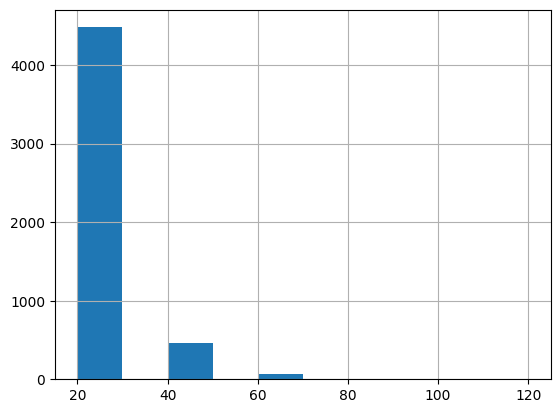

In [70]:
df_full.groupby('worker_id').size().hist()

In [71]:
# individual labels distribution
df_full['toxic'].value_counts(normalize=True)

0    0.700993
1    0.299007
Name: toxic, dtype: float64

In [72]:
df_full['toxic'].value_counts(normalize=False)

0    78357
1    33423
Name: toxic, dtype: int64

In [73]:
df_full.groupby('id').ngroups

22360

In [74]:
df_full.groupby('id').size().value_counts()

5    22340
4       20
dtype: int64